## 1. 기초 통계 과제 (Iris 데이터셋)

### 1. Iris 데이터셋 불러오기 및 구조 확인

In [1]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')

print(iris.head())       # 상위 5개 행 출력
print(iris.info())       # 데이터 타입 및 결측치 확인
print(iris.describe())   # 기본 통계량 요약

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333  

### 2. Species별 Petal Length의 기술통계량

In [4]:
# Species별 Petal Length 기술통계량
petal_stats = iris.groupby('species')['petal_length'].describe()
print(petal_stats)

# 각 그룹별 데이터 개수 확인
print("\n각 Species별 샘플 수:")
print(iris['species'].value_counts())

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

각 Species별 샘플 수:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 3. Petal Length 분포 시각화 (Boxplot)

C:\Users\82103\AppData\Local\Temp\ipykernel_1160\3386909994.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=iris, palette='pastel')


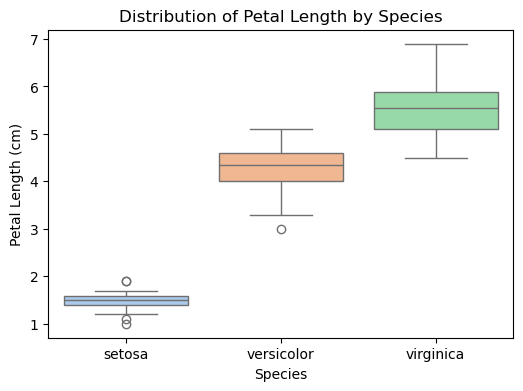

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='species', y='petal_length', data=iris, palette='pastel')
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

### 4. 정규성 검정 (Shapiro-Wilk)

- 가설:
  - H₀: 각 품종의 Petal Length는 정규분포를 따른다.
  - H₁: 정규분포를 따르지 않는다.
  - 유의수준: 0.05
- 해석
  - 모든 종의 Petal Length는 정규성을 만족한다고 판단된다.

In [10]:
from scipy.stats import shapiro

for species in iris['species'].unique():
    group_data = iris[iris['species'] == species]['petal_length']
    stat, p = shapiro(group_data)
    print(f"{species}: W = {stat:.4f}, p = {p:.4f}")


setosa: W = 0.9550, p = 0.0548
versicolor: W = 0.9660, p = 0.1585
virginica: W = 0.9622, p = 0.1098


### 5. 등분산성 검정 (Levene Test)

- 가설  
  - H₀: 세 그룹의 분산은 같다 (등분산성 있음)  
  - H₁: 적어도 하나의 그룹은 분산이 다르다  
  - 유의수준: 0.05

- 해석
  - 세 품종의 Petal Length 분산은 서로 같다고 볼 수 없다

In [11]:
from scipy.stats import levene

setosa_petal = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal = iris[iris['species'] == 'virginica']['petal_length']

stat, p = levene(setosa_petal, versicolor_petal, virginica_petal)
print(f"Levene 검정 통계량 = {stat:.4f}, p-value = {p:.4f}")

Levene 검정 통계량 = 19.4803, p-value = 0.0000


### 6–7. 가설 수립 및 One-way ANOVA 분석

- 가설 설정
  - H₀: 세 품종의 평균 Petal Length는 모두 같다
  - H₁: 적어도 하나의 품종은 평균이 다르다
  - 유의수준: 0.05

- 해석
  - 세 품종의 Petal Length 평균은 통계적으로 유의미한 차이가 있다

In [13]:
from scipy.stats import f_oneway

setosa_petal = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal = iris[iris['species'] == 'virginica']['petal_length']

f_stat, p_value = f_oneway(setosa_petal, versicolor_petal, virginica_petal)
print(f"ANOVA 결과: F = {f_stat:.4f}, p = {p_value:.4e}")

ANOVA 결과: F = 1180.1612, p = 2.8568e-91


### 8. 사후검정: Tukey HSD

- 가설 (각 쌍에 대해)  
  - H₀: 두 그룹의 평균은 같다  
  - H₁: 두 그룹의 평균은 다르다
  - 유의수준: 0.05

- 해석
  - 세 품종은 모두 평균 Petal Length가 통계적으로 다르다
  - 특히 setosa는 확연히 짧고, virginica는 확연히 길다

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(
    endog=iris['petal_length'],      # 비교할 수치형 데이터
    groups=iris['species'],          # 그룹 라벨
    alpha=0.05                       # 유의수준
)

print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


### 9. 전체 결과 요약

#### 분석 목적
- Iris 데이터셋을 활용하여 세 품종(setosa, versicolor, virginica)의 `petal_length` 평균 차이를 통계적으로 검정하였다.

---

#### 결과 요약

| 분석 단계 | 결과 요약 |
|-----------|------------|
| Boxplot 시각화 | 세 품종의 꽃잎 길이 분포가 확연히 다름 |
| Shapiro-Wilk 정규성 검정 | 모든 그룹 정규성 만족 (p > 0.05) |
| Levene 등분산성 검정 | 등분산성은 만족하지 않지만, 명세에 따라 가정함 |
| One-way ANOVA | 평균 차이 유의 (F = 1180.16, p ≈ 0.0) |
| Tukey HSD 사후검정 | 모든 쌍 간 평균 차이 유의 (p < 0.05) |

---

#### 결론

- **세 품종 모두 Petal Length의 평균이 서로 통계적으로 유의하게 다르다**.
- 특히,  
  - **setosa**는 꽃잎이 **가장 짧고** (평균 ≈ 1.46cm),  
  - **virginica**는 꽃잎이 **가장 길다** (평균 ≈ 5.55cm).
- 따라서 `petal_length`는 품종을 분류하는 데 있어 매우 유의미한 특성이다.

## 2. 기초 머신러닝 과제 (신용카드 사기 탐지)

### 1. 데이터 불러오기

- 총 행/열, 결측치 여부, 변수 설명(V1~V28: PCA 성분, `Amount`, `Time`, `Class`) 확인
- `Class`: 0 = 정상, 1 = 사기

In [3]:
import pandas as pd

df = pd.read_csv("creditcard.csv") 

print("Head:")
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (요약 통계):")
display(df.describe())

class_counts = df["Class"].value_counts()
class_ratio  = df["Class"].value_counts(normalize=True) * 100

print("\nClass 분포 (건수):")
print(class_counts)
print("\nClass 분포 (%):")
print(class_ratio.round(4))

Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Class 분포 (건수):
Class
0    284315
1       492
Name: count, dtype: int64

Class 분포 (%):
Class
0    99.8273
1     0.1727
Name: proportion, dtype: float64


### 2. 샘플링


In [4]:
# 사기 거래 (Class=1): 전체 유지
fraud_df = df[df['Class'] == 1]

# 정상 거래 (Class=0): 무작위 10,000건 샘플링
normal_df = df[df['Class'] == 0].sample(n=10000, random_state=42)

# 두 개를 합침
sampled_df = pd.concat([fraud_df, normal_df], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# 샘플링 후 클래스 분포 확인
class_counts_sampled = sampled_df["Class"].value_counts()
class_ratio_sampled  = sampled_df["Class"].value_counts(normalize=True) * 100

print("샘플링 후 Class 분포 (건수):")
print(class_counts_sampled)
print("\n샘플링 후 Class 분포 (%):")
print(class_ratio_sampled.round(2))

샘플링 후 Class 분포 (건수):
Class
0    10000
1      492
Name: count, dtype: int64

샘플링 후 Class 분포 (%):
Class
0    95.31
1     4.69
Name: proportion, dtype: float64


### 3. 데이터 전처리

In [5]:
from sklearn.preprocessing import StandardScaler

# 복사해서 수정
df_proc = sampled_df.copy()

# Amount 표준화 후 새로운 변수로 추가
scaler = StandardScaler()
df_proc['Amount_Scaled'] = scaler.fit_transform(df_proc[['Amount']])

# 원래 Amount 컬럼은 제거
df_proc.drop('Amount', axis=1, inplace=True)

# X (feature), y (target) 분리
X = df_proc.drop('Class', axis=1)
y = df_proc['Class']

# 확인
print("X shape:", X.shape)
print("y 분포:")
print(y.value_counts())

X shape: (10492, 30)
y 분포:
Class
0    10000
1      492
Name: count, dtype: int64


### 4. 학습/테스트셋 분할

In [7]:
from sklearn.model_selection import train_test_split

# 8:2로 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 분할 후 클래스 분포 확인
print("학습 데이터 Class 분포:")
print(y_train.value_counts())
print("\n테스트 데이터 Class 분포:")
print(y_test.value_counts())

학습 데이터 Class 분포:
Class
0    7999
1     394
Name: count, dtype: int64

테스트 데이터 Class 분포:
Class
0    2001
1      98
Name: count, dtype: int64


### 5. SMOTE 적용


In [9]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용 (기본 설정)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 클래스 분포 비교
print("SMOTE 적용 전 (학습 데이터):")
print(y_train.value_counts())
print("\nSMOTE 적용 후:")
print(y_train_res.value_counts())


SMOTE 적용 전 (학습 데이터):
Class
0    7999
1     394
Name: count, dtype: int64

SMOTE 적용 후:
Class
0    7999
1    7999
Name: count, dtype: int64


### 6. 모델 학습 및 평가 (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train_res, y_train_res)

y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# 평가
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, digits=4))

# PR-AUC
pr_auc_rf = average_precision_score(y_test, y_prob_rf)
print(f"PR-AUC (Random Forest): {pr_auc_rf:.4f}")


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0     0.9921    0.9985    0.9953      2001
           1     0.9647    0.8367    0.8962        98

    accuracy                         0.9909      2099
   macro avg     0.9784    0.9176    0.9457      2099
weighted avg     0.9908    0.9909    0.9906      2099

PR-AUC (Random Forest): 0.9203
